In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
stock=pd.read_csv("BAJFIN.csv")

In [5]:
print(stock.head(10))

        Date    Open     High      Low    Close   Volume
0  22-Apr-21  4550.0  4714.00  4505.75  4688.70  2563539
1  23-Apr-21  4621.1  4759.80  4610.50  4667.80  2729525
2  26-Apr-21  4690.0  4829.00  4690.00  4736.55  2903989
3  27-Apr-21  4747.0  4889.85  4746.55  4865.05  2644997
4  28-Apr-21  4915.0  5310.00  4915.00  5280.90  8576454
5  29-Apr-21  5350.0  5525.00  5330.00  5484.85  7258486
6  30-Apr-21  5350.0  5524.65  5327.70  5451.90  4124888
7  03-May-21  5316.3  5580.00  5291.25  5551.15  4033591
8  04-May-21  5610.0  5749.95  5560.00  5615.75  4838347
9  05-May-21  5683.0  5700.00  5452.40  5515.15  4378693


In [6]:
stock['Date']=pd.to_datetime(stock.Date)

In [7]:
stock.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [8]:
stock.describe()

,Open,High,Low,Close,Volume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,6799.433133,6891.463454,6708.109839,6799.742570,1.505290e+06
std,768.627400,765.193198,750.094211,750.420487,1.015739e+06
min,4550.000000,4714.000000,4505.750000,4667.800000,9.403300e+04
25%,6175.000000,6228.850000,6103.600000,6161.850000,8.709900e+05
50%,6980.000000,7054.000000,6870.000000,6980.100000,1.251249e+06
75%,7445.500000,7514.500000,7352.000000,7440.300000,1.738340e+06
max,8050.000000,8050.000000,7861.300000,7929.300000,8.576454e+06


In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   Open    249 non-null    float64       
 2   High    249 non-null    float64       
 3   Low     249 non-null    float64       
 4   Close   249 non-null    float64       
 5   Volume  249 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


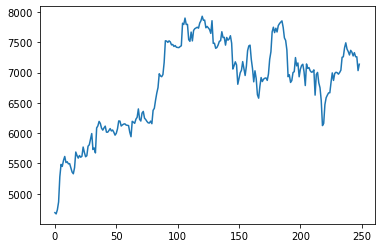

In [10]:
stock['Close'].plot()
plt.show()

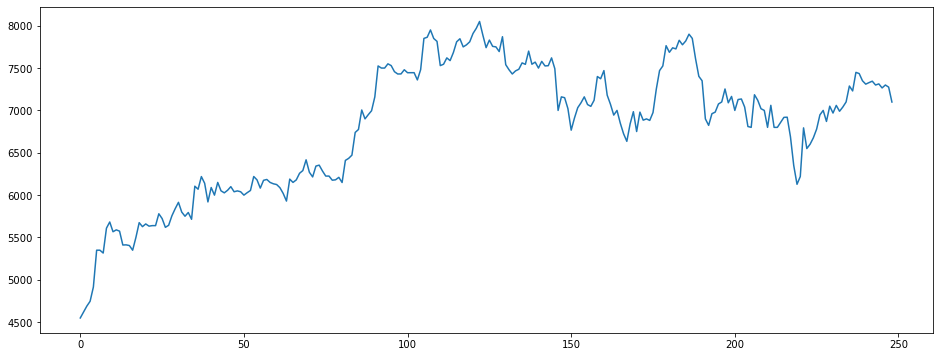

In [11]:
 stock['Open'].plot(figsize=(16,6))
plt.show()

In [12]:
X= stock[['Open','High','Low','Volume']]
y= stock['Close']

In [13]:
X_train , X_test, y_train , y_test = train_test_split(X, y, random_state = 0)

In [14]:
X_train.shape

(186, 4)

In [15]:
X_test.shape

(63, 4)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
print(regressor.coef_)

[-5.71306589e-01  9.47664657e-01  6.10869821e-01 -1.01632780e-05]


In [19]:
print(regressor.intercept_)

70.65693507845299


In [20]:
predicted=regressor.predict(X_test)

In [21]:
print(X_test)

       Open     High      Low   Volume
248  7099.0  7187.00  7047.30   875343
168  6840.0  6993.50  6838.25  1339399
76   6225.0  6248.45  6142.05   731009
150  6767.0  6980.00  6678.30  1491815
145  7492.0  7514.50  6990.05  1935243
..      ...      ...      ...      ...
146  7000.0  7178.00  6924.10  1187589
160  7470.0  7477.00  7199.00  1298599
214  6860.0  7025.00  6806.60  1580891
126  7756.0  7935.00  7665.00  1517376
59   6133.9  6177.20  6102.00   870990

[63 rows x 4 columns]


In [22]:
dframe=pd.DataFrame(y_test,predicted)

In [23]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [24]:
print(dfr)

     Actual Price  Predicted Price
248       7138.10      7121.903888
168       6917.75      6954.080517
76        6170.10      6180.272184
150       6905.75      6883.734751
145       7058.30      7161.996218
..            ...              ...
146       7114.30      7091.501654
160       7218.75      7273.139178
214       7002.30      6950.717442
126       7710.20      7826.217752
59        6129.70      6138.909105

[63 rows x 2 columns]


In [25]:
regressor.score(X_test,y_test)

0.9969729462091038

In [26]:
import math

In [27]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 28.879348852212186


In [28]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 1469.9126201727197


In [29]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 38.33943948693981


In [ ]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

In [30]:
graph=dfr.head(20)

<AxesSubplot:>

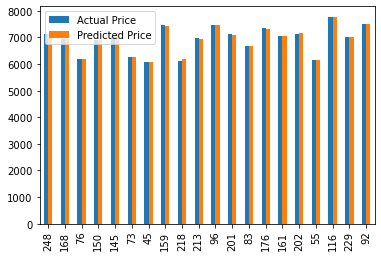

In [31]:
graph.plot(kind='bar')

<AxesSubplot:>

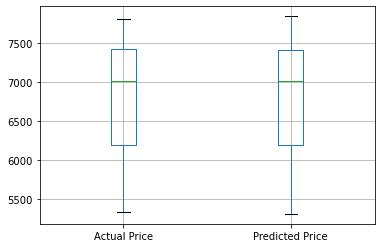

In [35]:
dfr.boxplot()

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual Price'>

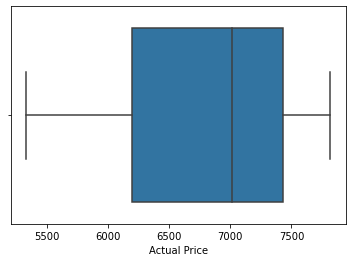

In [47]:
sns.boxplot(dfr['Actual Price'])

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

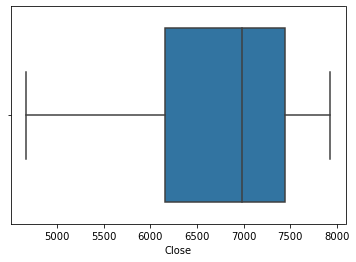

In [46]:
sns.boxplot(stock['Close'])

Text(0, 0.5, 'Predicted Price')

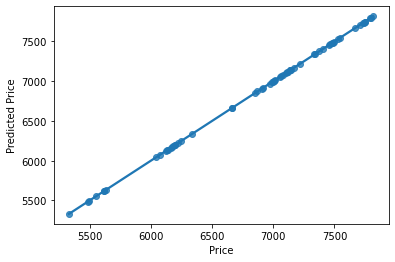

In [50]:
sns.regplot(x=y_test,y=y_test)
plt.xlabel('Price')
plt.ylabel('Predicted Price')

In [51]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
ls.summary()

C:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          1.76e-223
Time:                        18:56:12   Log-Likelihood:                -967.20
No. Observations:                 186   AIC:                             1944.
Df Residuals:                     181   BIC:                             1961.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.6569     38.376      1.841      0.067      -5.065     146.379
Open          -0.5713      0.050    -11.392      0.000      -0.670      -0.472
High           0.9477      0.061     15.608      0.000       0.828       1.067
Low            0.6109      0.054     11.237      0.000       0.504       0.718
Volume     -1.016e-05   5.26e-06     -1.934      0.055   -2.05e-05    2.07e-07
==============================================================================
Omnibus:                        4.733   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.625
Skew:                          -0.265   Prob(JB):                       0.0990
Kurtosis:                       3.561   Cond. No.                     2.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""